## Install Pandas

In [99]:
pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load csv file

In [100]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/Users/anyakhurana/Documents/SRDS/Coding/Flask/rpoABC_variation_rifampicin_resistance.csv")

# Print the first few rows and the column names
print(df.columns)
print(df.head())




FileNotFoundError: [Errno 2] No such file or directory: '/Users/anyakhurana/Documents/SRDS/Coding/Flask/rpoABC_variation_rifampicin_resistance.csv'

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Print the first few rows and the column names
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'NC_000962.3:3877464-3878507+287',
       'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36',
       'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132',
       'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606',
       'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696',
       'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857',
       'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289',
       'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304',
       'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333',
       'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335',
       'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471',
       'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479',
       'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189',
       'NC_000962.3:759807-763325+3225', 'NC_000962.3:

## Fasta FIle

In [ ]:
# Drop the index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Get only the nucleotide columns (excluding Sample, ID, Resistance)
nucleotide_cols = df.columns[:-3]


# we are creating the fasta file here - the fasta file is already created
# we taking the file we already downloaded two steps prior and saving it as a fasta file 
#joining the two columns from 
#data --> looping thorugh rows of data --> able to extract sequence ID becuase there a row iwth the colmn ID --> know what sequence is bc we take all 
#nucleodies in the row and joining them together 
#fasta is ^ ,  sequence id, ^
# Write to FASTA
with open("rpo_sequences.fasta", "w") as fasta_file:
    for idx, row in df.iterrows():
        seq_id = row['ID']
        sequence = ''.join([str(row[col]) for col in nucleotide_cols])
        fasta_file.write(f">{seq_id}\n{sequence}\n")


## Confirm Fasta Works

In [ ]:
# Show first 3 entries of the FASTA file
with open("rpo_sequences.fasta") as f:
    for i in range(6):  # 2 lines per FASTA entry
        print(f.readline().strip())


## import
import os
print(os.listdir())


>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
['accuracy_vs_variables_models_with_logreg.png', 'rpoABC_variants.fasta.treefile', 'rpoABC_variants_unique.fasta', 'accuracy_vs_variables.png', 'Sample phylogenetic_tree.nwk', 'benchmark_table.png', 'fig2_feature_importances.png', 'rpoABC_variants.fasta.contree', 'rpoABC_variants.fasta.uniqueseq.phy', 'hamming_distances.csv', 'accuracy_vs_variables_models_logreg_highest_fixed.png', 'aligned_sequences.fasta', 'feature_importance_drug_resistance.png', 'rpoABC_variants.fasta.log', 'rpoABC_variants.fasta.ckp.gz', 'feature_importances.png', 'accuracy_vs_variables_with_real_logreg.png', 'rpoABC_variation_rifampicin_resistance.csv', 'rpoABC_variants.fasta.mldist', 'accuracy_vs_variables_models_rf_visible.png', 'model_comparison_table.csv', 'resistant_protein.fasta', 'confusion_matrices_panel.png', 'ac

## Number of Lines in Fasta

In [ ]:
with open("rpo_sequences.fasta") as f:
    lines = f.readlines()
    print(f"Number of lines in FASTA file: {len(lines)}")

    # Show the first few lines
    print("\n--- First 10 lines ---")
    for line in lines[:10]:
        print(line.strip())


with open("rpo_sequences.fasta") as f:
    lines = f.readlines()
    print(f"Number of lines in FASTA file: {len(lines)}")
    print("\n--- First 6 lines ---")
    for line in lines[:6]:
        print(line.strip())


Number of lines in FASTA file: 196

--- First 10 lines ---
>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
>ERR4810486
TTTGTTCCCGCTCGAGCAGCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810491
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
Number of lines in FASTA file: 196

--- First 6 lines ---
>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC


## Hamming Distance - Analyze DNA Sequences

In [ ]:
from itertools import combinations

# Read sequences from the FASTA file
sequences = {}
with open("rpo_sequences.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):  # Every 2 lines (header + sequence)
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        sequences[header] = sequence

# Function to calculate Hamming distance
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

# Calculate pairwise Hamming distances
distances = {}
for (header1, seq1), (header2, seq2) in combinations(sequences.items(), 2):
    distance = hamming_distance(seq1, seq2)
    distances[(header1, header2)] = distance

# Show the first 5 pairwise distances
for pair, dist in list(distances.items())[:5]:
    print(f"{pair[0]} vs {pair[1]}: Hamming distance = {dist}")




>ERR4810461 vs >ERR4810467: Hamming distance = 2
>ERR4810461 vs >ERR4810478: Hamming distance = 1
>ERR4810461 vs >ERR4810486: Hamming distance = 3
>ERR4810461 vs >ERR4810491: Hamming distance = 3
>ERR4810461 vs >ERR4810492: Hamming distance = 2


## Add onto Distance Code

In [ ]:
with open("hamming_distances.csv", "w") as f:
    f.write("Pair, Hamming Distance\n")
    for pair, dist in distances.items():
        f.write(f"{pair[0]} vs {pair[1]}, {dist}\n")


## Set the working directory to where  project files are located

In [ ]:
import os

# Set the working directory to where  project files are located
os.chdir("/Users/anyakhurana/Documents/Rpo_analysis_project")

# Check the current working directory
print(os.getcwd())

import os
print(os.getcwd())


/Users/anyakhurana/Documents/Rpo_analysis_project
/Users/anyakhurana/Documents/Rpo_analysis_project


## Process to Create the FASTA File - Locate CSV Columns

In [ ]:
# Define the full path to save the file (e.g., in the 'Documents' folder)
file_path = "/Users/anyakhurana/Documents/rpo_sequences.fasta"
with open(file_path, "w") as fasta_file:
    for idx, row in df.iterrows():
        seq_id = row['ID']
        sequence = ''.join([str(row[col]) for col in nucleotide_cols])
        fasta_file.write(f">{seq_id}\n{sequence}\n")

import pandas as pd

csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
df = pd.read_csv(csv_file)
print("CSV Columns:", df.columns.tolist())


import pandas as pd

# Define file paths (update these paths if necessary)
csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
fasta_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Print the columns and first few rows so you can verify the data
print("CSV Columns:", df.columns.tolist())
print("First few rows:")
print(df.head())

# Choose the correct column names based on your CSV
# Use "ID" as the sample identifier, the coordinate column as the sequence, and "Resistance" for labeling.
identifier_col = "ID"
sequence_col = "NC_000962.3:3877464-3878507+287"  # Change this if you want a different sequence column
resistance_col = "Resistance"

# Ensure that the necessary columns are present
required_columns = [identifier_col, sequence_col, resistance_col]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Create the FASTA file by iterating over the rows of the DataFrame
with open(fasta_file, "w") as out_file:
    for _, row in df.iterrows():
        # Create a FASTA header with the sample identifier and resistance information
        header = f">sample_{row[identifier_col]}_resistance_{row[resistance_col]}"
        sequence = row[sequence_col]
        out_file.write(header + "\n")
        out_file.write(sequence + "\n")

print(f"FASTA file '{fasta_file}' created successfully!")



CSV Columns: ['Unnamed: 0', 'NC_000962.3:3877464-3878507+287', 'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36', 'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132', 'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606', 'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696', 'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857', 'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289', 'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304', 'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333', 'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335', 'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471', 'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479', 'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189', 'NC_000962.3:759807-763325+3225', 'NC_000962.3:763370-767320+321', 'NC_000962.3:763370-767320+1204', 'NC_000962.3:763370-767320+129

## Find the Shape and Coordinates and Nucelotide Correspondence 

In [ ]:
print(df.shape)

print(df.iloc[0])

(98, 56)
Unnamed: 0                                  0
NC_000962.3:3877464-3878507+287             T
NC_000962.3:3877464-3878507+689             T
NC_000962.3:759807-763325+36                T
NC_000962.3:759807-763325+97                G
NC_000962.3:759807-763325+132               T
NC_000962.3:759807-763325+509               T
NC_000962.3:759807-763325+606               C
NC_000962.3:759807-763325+673               C
NC_000962.3:759807-763325+696               C
NC_000962.3:759807-763325+801               G
NC_000962.3:759807-763325+857               C
NC_000962.3:759807-763325+1133              T
NC_000962.3:759807-763325+1289              T
NC_000962.3:759807-763325+1303              G
NC_000962.3:759807-763325+1304              A
NC_000962.3:759807-763325+1325              G
NC_000962.3:759807-763325+1333              C
NC_000962.3:759807-763325+1334              A
NC_000962.3:759807-763325+1335              C
NC_000962.3:759807-763325+1349              T
NC_000962.3:759807-763325

## Created Final Fasta File

In [ ]:
import pandas as pd

# Load your data
csv_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv"
df = pd.read_csv(csv_file)

# Define output FASTA path
fasta_file = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta"

# Get the mutation columns (everything between Unnamed:0 and Resistance)
mutation_cols = df.columns[1:-3]  # Skip 'Unnamed: 0', 'Sample', 'ID', 'Resistance'

# Write to FASTA
with open(fasta_file, "w") as out_file:
    for idx, row in df.iterrows():
        sample_id = row['ID']
        resistance = row['Resistance']
        sequence = ''.join(row[col] for col in mutation_cols)

        header = f">sample_{sample_id}_resistance_{resistance}"
        out_file.write(header + "\n")
        out_file.write(sequence + "\n")

print(f"✅ FASTA file created: {fasta_file}")


✅ FASTA file created: /Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta


## Check if Fasta Works

In [ ]:
with open("rpo_sequences.fasta") as f:
    print(f.read())

>ERR4810461
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810467
CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810478
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
>ERR4810486
TTTGTTCCCGCTCGAGCAGCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810491
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810492
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810493
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810494
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810495
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810497
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810498
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810507
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810512
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810516
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
>ERR4810518
TTTGTTCCCGCTTGAGCACCATCAGTTCGTGCTGGGATGCACAGCCACTCTC
>ERR4810520
TTTGTTCCCGCTT

In [ ]:
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):  # Check every header and sequence pair
        print(f"Header: {lines[i].strip()}")
        print(f"Sequence: {lines[i+1].strip()}")

        



Header: >sample_ERR4810461_resistance_R
Sequence: TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810467_resistance_R
Sequence: CTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810478_resistance_R
Sequence: TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810486_resistance_R
Sequence: TTTGTTCCCGCTCGAGCAGCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810491_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810492_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810493_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810494_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810495_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
Header: >sample_ERR4810497_resistance_S
Sequence: TTTGTTCCCGCTTGAGCACCATC

## Fix the Fasta File - Remove Duplicates

In [ ]:
from collections import Counter

sequences = {}
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        sequences[header] = sequence

duplicates = [seq for seq, count in Counter(sequences.values()).items() if count > 1]
print(f"Number of duplicate sequences: {len(duplicates)}")

## Demonstrate Duplicate Removal

from collections import Counter

sequences = {}
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        sequences[header] = sequence

duplicates = [seq for seq, count in Counter(sequences.values()).items() if count > 1]
print(f"Number of duplicate sequences: {len(duplicates)}")
print("\nDuplicate sequences:")
for seq in duplicates:
    print(seq)

Number of duplicate sequences: 10
Number of duplicate sequences: 10

Duplicate sequences:
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACTATCAGCCCATGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACCATCGGTCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCTGCTTGAGCACCATCAGTCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGGGCACCCTCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTCGGGCACCATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGTTTGAGCACTATCAGCCCGTGCTGGGATGCACAGCCACTCTC
TTTGTTCCCGCTTGAGCACTATCAGCCCGTGCGGGGATGCACAGCCACTCTC


## Fix the Duplicates into a New File (Separated from original)

In [ ]:
unique_sequences = {}
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants.fasta") as f:
    lines = f.readlines()
    for i in range(0, len(lines), 2):
        header = lines[i].strip()
        sequence = lines[i+1].strip()
        if sequence not in unique_sequences.values():
            unique_sequences[header] = sequence

# Write the unique sequences to a new FASTA file
with open("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variants_unique.fasta", "w") as f:
    for header, sequence in unique_sequences.items():
        f.write(f"{header}\n{sequence}\n")

print("Unique FASTA file created: rpoABC_variants_unique.fasta")

Unique FASTA file created: rpoABC_variants_unique.fasta


## Align the New Fasta File + Organize

In [ ]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator

alignment = AlignIO.read("/Users/anyakhurana/Documents/Rpo_analysis_project/aligned_sequences.fasta", "fasta")
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

sample_ERR4810461_resistance_R  0.000000
sample_ERR4810467_resistance_R  0.038462    0.000000
sample_ERR4810478_resistance_R  0.019231    0.057692    0.000000
sample_ERR4810486_resistance_R  0.057692    0.096154    0.076923    0.000000
sample_ERR4810491_resistance_S  0.057692    0.096154    0.076923    0.076923    0.000000
sample_ERR4810492_resistance_S  0.038462    0.076923    0.057692    0.057692    0.019231    0.000000
sample_ERR4810495_resistance_S  0.019231    0.057692    0.038462    0.038462    0.038462    0.019231    0.000000
sample_ERR4810518_resistance_S  0.057692    0.096154    0.076923    0.076923    0.038462    0.019231    0.038462    0.000000
sample_ERR4810520_resistance_S  0.057692    0.096154    0.076923    0.076923    0.038462    0.019231    0.038462    0.038462    0.000000
sample_ERR4810526_resistance_S  0.057692    0.096154    0.076923    0.076923    0.038462    0.019231    0.038462    0.038462    0.038462    0.000000
sample_ERR4810531_resistance_S  0.057692    0.0961

## Take the Fasta File and create Philogenetic Tree (Genetic Relationships between Resistant and Susceptible Strains)

## Best Depiction I could do - Please find way to improve 

In [ ]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor


In [ ]:
pip install biopython



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Figure size 1500x2000 with 0 Axes>

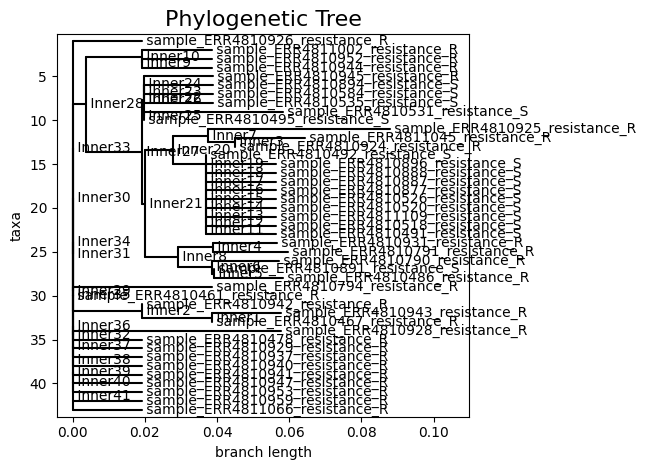

In [ ]:
from Bio import Phylo

import matplotlib.pyplot as plt

# Load the phylogenetic tree from the Newick file
tree = Phylo.read("/Users/anyakhurana/Documents/Rpo_analysis_project/phylogenetic_tree.nwk", "newick")

# Customize the figure size for better readability
plt.figure(figsize=(15, 20))  # Adjust the width and height as needed

# Draw the tree with labels
Phylo.draw(tree, do_show=False)  # Prevent immediate display

# Add title and adjust layout
plt.title("Phylogenetic Tree", fontsize=16)
plt.tight_layout()

# Show the tree
plt.show()


## Local Depiction of Philogenetic Tree

In [ ]:
from Bio import Phylo

tree = Phylo.read("/Users/anyakhurana/Documents/Rpo_analysis_project/phylogenetic_tree.nwk", "newick")
Phylo.draw_ascii(tree)

  ________ sample_ERR4810926_resistance_R
 |
 |         ________ sample_ERR4811002_resistance_R
 | _______|
 ||       |________ sample_ERR4810952_resistance_R
 ||       |
 ||       |________ sample_ERR4810944_resistance_R
 ||
 ||        _________ sample_ERR4810945_resistance_R
 ||       |
 ||       |_________ sample_ERR4810894_resistance_S
 ||       |
 ||       |_________ sample_ERR4810584_resistance_S
 ,|       |
 ||       |_________ sample_ERR4810535_resistance_S
 ||       |
 ||       |__________________ sample_ERR4810531_resistance_S
 ||       |
 ||       | sample_ERR4810495_resistance_S
 ||       |
 ||       |         ________________________ sample_ERR4810925_resistance_R
 ||       |    ____|
 ||       |   |    |    ________ sample_ERR4811045_resistance_R
 ||       |   |    |___|
 ||_______|___|        | sample_ERR4810924_resistance_R
 |        |   |
 |        |   |    , sample_ERR4810492_resistance_S
 |        |   |____|
 |        |        |________ sample_ERR4810896_resistance_S

## Check all the Files to see they are running correctly

In [ ]:
import os
print(os.listdir("/Users/anyakhurana/Documents/Rpo_analysis_project"))

['accuracy_vs_variables_models_with_logreg.png', 'rpoABC_variants.fasta.treefile', 'rpoABC_variants_unique.fasta', 'accuracy_vs_variables.png', 'Sample phylogenetic_tree.nwk', 'benchmark_table.png', 'fig2_feature_importances.png', 'rpoABC_variants.fasta.contree', 'rpoABC_variants.fasta.uniqueseq.phy', 'hamming_distances.csv', 'accuracy_vs_variables_models_logreg_highest_fixed.png', 'aligned_sequences.fasta', 'feature_importance_drug_resistance.png', 'rpoABC_variants.fasta.log', 'rpoABC_variants.fasta.ckp.gz', 'feature_importances.png', 'accuracy_vs_variables_with_real_logreg.png', 'rpoABC_variation_rifampicin_resistance.csv', 'rpoABC_variants.fasta.mldist', 'accuracy_vs_variables_models_rf_visible.png', 'model_comparison_table.csv', 'resistant_protein.fasta', 'confusion_matrices_panel.png', 'accuracy_vs_variables_models_logreg_highest.png', 'fig5_grouped_barchart_metrics.png', 'rpoABC_variants.fasta.splits.nex', 'rpoABC_variants.fasta', 'f1_distributions.png', 'fig1_accuracy_vs_variabl

# Machine Learning Subset of Project

In [ ]:
print(df.dtypes)
print(df.head())

Unnamed: 0                          int64
NC_000962.3:3877464-3878507+287    object
NC_000962.3:3877464-3878507+689    object
NC_000962.3:759807-763325+36       object
NC_000962.3:759807-763325+97       object
NC_000962.3:759807-763325+132      object
NC_000962.3:759807-763325+509      object
NC_000962.3:759807-763325+606      object
NC_000962.3:759807-763325+673      object
NC_000962.3:759807-763325+696      object
NC_000962.3:759807-763325+801      object
NC_000962.3:759807-763325+857      object
NC_000962.3:759807-763325+1133     object
NC_000962.3:759807-763325+1289     object
NC_000962.3:759807-763325+1303     object
NC_000962.3:759807-763325+1304     object
NC_000962.3:759807-763325+1325     object
NC_000962.3:759807-763325+1333     object
NC_000962.3:759807-763325+1334     object
NC_000962.3:759807-763325+1335     object
NC_000962.3:759807-763325+1349     object
NC_000962.3:759807-763325+1471     object
NC_000962.3:759807-763325+2014     object
NC_000962.3:759807-763325+2479    

## Define Mapping of Nucelotides

In [ ]:
# Define a mapping for nucleotide encoding
nucleotide_mapping = {'A': 0, 'T': 1, 'C': 2, 'G': 3}

# Apply the mapping to all feature columns
for col in df.columns[:-2]:  # Exclude 'ID' and 'Resistance'
    df[col] = df[col].map(nucleotide_mapping)

## Check all columns are correct

In [ ]:
print(df.isnull().sum())

Unnamed: 0                         98
NC_000962.3:3877464-3878507+287     0
NC_000962.3:3877464-3878507+689     0
NC_000962.3:759807-763325+36        0
NC_000962.3:759807-763325+97        0
NC_000962.3:759807-763325+132       0
NC_000962.3:759807-763325+509       0
NC_000962.3:759807-763325+606       0
NC_000962.3:759807-763325+673       0
NC_000962.3:759807-763325+696       0
NC_000962.3:759807-763325+801       0
NC_000962.3:759807-763325+857       0
NC_000962.3:759807-763325+1133      0
NC_000962.3:759807-763325+1289      0
NC_000962.3:759807-763325+1303      0
NC_000962.3:759807-763325+1304      0
NC_000962.3:759807-763325+1325      0
NC_000962.3:759807-763325+1333      0
NC_000962.3:759807-763325+1334      0
NC_000962.3:759807-763325+1335      0
NC_000962.3:759807-763325+1349      0
NC_000962.3:759807-763325+1471      0
NC_000962.3:759807-763325+2014      0
NC_000962.3:759807-763325+2479      0
NC_000962.3:759807-763325+2728      0
NC_000962.3:759807-763325+3189      0
NC_000962.3:

# Random Forest

In [103]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)


In [ ]:
print(df.dtypes)


Unnamed: 0                         float64
NC_000962.3:3877464-3878507+287      int64
NC_000962.3:3877464-3878507+689      int64
NC_000962.3:759807-763325+36         int64
NC_000962.3:759807-763325+97         int64
NC_000962.3:759807-763325+132        int64
NC_000962.3:759807-763325+509        int64
NC_000962.3:759807-763325+606        int64
NC_000962.3:759807-763325+673        int64
NC_000962.3:759807-763325+696        int64
NC_000962.3:759807-763325+801        int64
NC_000962.3:759807-763325+857        int64
NC_000962.3:759807-763325+1133       int64
NC_000962.3:759807-763325+1289       int64
NC_000962.3:759807-763325+1303       int64
NC_000962.3:759807-763325+1304       int64
NC_000962.3:759807-763325+1325       int64
NC_000962.3:759807-763325+1333       int64
NC_000962.3:759807-763325+1334       int64
NC_000962.3:759807-763325+1335       int64
NC_000962.3:759807-763325+1349       int64
NC_000962.3:759807-763325+1471       int64
NC_000962.3:759807-763325+2014       int64
NC_000962.3

In [ ]:
for col in df.columns[1:-2]:  # assuming mutations columns are here
    print(f"Position: {col}")
    print(df.groupby('Resistance')[col].value_counts())
    print()


Position: NC_000962.3:3877464-3878507+287
Resistance  NC_000962.3:3877464-3878507+287
R           1                                  47
            2                                   2
S           1                                  49
Name: count, dtype: int64

Position: NC_000962.3:3877464-3878507+689
Resistance  NC_000962.3:3877464-3878507+689
R           1                                  48
            2                                   1
S           1                                  49
Name: count, dtype: int64

Position: NC_000962.3:759807-763325+36
Resistance  NC_000962.3:759807-763325+36
R           1                               49
S           1                               48
            2                                1
Name: count, dtype: int64

Position: NC_000962.3:759807-763325+97
Resistance  NC_000962.3:759807-763325+97
R           3                               49
S           3                               48
            2                                1
Name:

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Object columns:", object_cols)


Object columns: ['ID', 'Resistance']


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
print(df.dtypes)

Unnamed: 0                         float64
NC_000962.3:3877464-3878507+287      int64
NC_000962.3:3877464-3878507+689      int64
NC_000962.3:759807-763325+36         int64
NC_000962.3:759807-763325+97         int64
NC_000962.3:759807-763325+132        int64
NC_000962.3:759807-763325+509        int64
NC_000962.3:759807-763325+606        int64
NC_000962.3:759807-763325+673        int64
NC_000962.3:759807-763325+696        int64
NC_000962.3:759807-763325+801        int64
NC_000962.3:759807-763325+857        int64
NC_000962.3:759807-763325+1133       int64
NC_000962.3:759807-763325+1289       int64
NC_000962.3:759807-763325+1303       int64
NC_000962.3:759807-763325+1304       int64
NC_000962.3:759807-763325+1325       int64
NC_000962.3:759807-763325+1333       int64
NC_000962.3:759807-763325+1334       int64
NC_000962.3:759807-763325+1335       int64
NC_000962.3:759807-763325+1349       int64
NC_000962.3:759807-763325+1471       int64
NC_000962.3:759807-763325+2014       int64
NC_000962.3

In [ ]:
from sklearn.model_selection import train_test_split

# 80% of data goes to training, 20% to testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train your pipeline on training data only
pipe.fit(X_train, y_train)

# Predict on training set (to check training performance)
train_proba = pipe.predict_proba(X_train)[:, 1]
train_pred = (train_proba >= 0.5).astype(int)

# Predict on testing set (to check generalization)
test_proba = pipe.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= 0.5).astype(int)

# Print metrics on training data
print("=== Training Set Performance ===")
print(classification_report(y_train, train_pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Train):", roc_auc_score(y_train, train_proba))
print("Avg Precision (Train):", average_precision_score(y_train, train_proba))

# Print metrics on testing data
print("\n=== Testing Set Performance ===")
print(classification_report(y_test, test_pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Test):", roc_auc_score(y_test, test_proba))
print("Avg Precision (Test):", average_precision_score(y_test, test_proba))


NameError: name 'pipe' is not defined

In [ ]:
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

print("First 5 training labels:", y_train[:5])
print("First 5 test labels:", y_test[:5])


Training set size: 78
Test set size: 20
First 5 training labels: 19    0
67    1
72    1
74    1
0     1
Name: Resistance, dtype: int64
First 5 test labels: 73    1
66    1
55    1
1     1
11    0
Name: Resistance, dtype: int64


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Convert labels to numeric
y_numeric = y.map({'S': 0, 'R': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.2, stratify=y_numeric, random_state=42
)

# Define model
pipe = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

# Fit model
pipe.fit(X_train, y_train)

# Predictions
train_proba = pipe.predict_proba(X_train)[:, 1]
train_pred = (train_proba >= 0.5).astype(int)
test_proba = pipe.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= 0.5).astype(int)

# Metrics
print("=== Training Set Performance ===")
print(classification_report(y_train, train_pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Train):", roc_auc_score(y_train, train_proba))
print("Avg Precision (Train):", average_precision_score(y_train, train_proba))

print("\n=== Testing Set Performance ===")
print(classification_report(y_test, test_pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Test):", roc_auc_score(y_test, test_proba))
print("Avg Precision (Test):", average_precision_score(y_test, test_proba))


ValueError: could not convert string to float: 'T'

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# === 1. Load your data (replace with your actual data loading code) ===
# For example:
# X = pd.read_csv("your_features.csv")
# y = pd.read_csv("your_labels.csv").squeeze()  # make sure y is a Series, not DataFrame

# Make sure X and y are defined before continuing!

# === 2. Encode categorical/string features into numeric using one-hot encoding ===
X_encoded = pd.get_dummies(X)

# === 3. Define hyperparameter search space (small grid for speed) ===
param_grid = {
    'n_estimators': [50, 100],           
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5],         
}

# === 4. Initialize Random Forest with parallel processing for speed ===
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# === 5. Setup RandomizedSearchCV for fast hyperparameter tuning ===
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,            # number of parameter settings that are sampled
    cv=5,                 # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,            # use all CPU cores to speed up
    verbose=2             # show progress logs
)

# === 6. Run the hyperparameter tuning ===
random_search.fit(X_encoded, y)

# === 7. Print best parameters and best cross-validation accuracy ===
print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2,

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Your preprocessed data (make sure X_encoded and y are defined before this)
# X_encoded = ...  # your encoded feature matrix
# y = ...          # your labels

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],          # number of trees
    'max_depth': [None, 10, 20, 30, 40],          # max tree depth
    'min_samples_split': [2, 5, 10],               # minimum samples to split node
    'min_samples_leaf': [1, 2, 4],                 # minimum samples at leaf node
    'max_features': ['auto', 'sqrt', 'log2']       # features to consider at split
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Setup RandomizedSearchCV with 10-fold CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,          # number of parameter combos to try
    cv=10,              # 10-fold cross-validation
    verbose=2,          # show progress
    random_state=42,
    n_jobs=-1           # use all CPU cores
)

# Run hyperparameter tuning
random_search.fit(X_encoded, y)

# Print best parameters and accuracy
print("Best parameters found:", random_search.best_params_)
print(f"Best cross-validation accuracy: {random_search.best_score_:.4f}")


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~

Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best cross-validation accuracy: 0.9000


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Make sure X_encoded and y are ready

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,          # number of random combos to try
    cv=15,              # 15-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_encoded, y)

print("Best parameters found:", random_search.best_params_)
print(f"Best cross-validation accuracy: {random_search.best_score_:.4f}")


Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


X_encoded = pd.get_dummies(X)


model = RandomForestClassifier(random_state=42)


scores = cross_val_score(model, X_encoded, y, cv=5)


print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation accuracies: [0.85       0.85       0.9        0.78947368 0.47368421]
Average accuracy: 0.7726315789473684


In [ ]:
print("Missing values in features:", X_encoded.isnull().sum().sum())
print("Class distribution:\n", y.value_counts())


Missing values in features: 0
Class distribution:
 Resistance
R    49
S    49
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assume X and y are already defined and X_encoded is your one-hot encoded X
X_encoded = pd.get_dummies(X)

model = RandomForestClassifier(random_state=42)

# Use StratifiedKFold to keep class proportions balanced in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation using the Stratified folds
scores = cross_val_score(model, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation accuracies: [0.9        0.9        0.85       0.89473684 0.94736842]
Average accuracy: 0.898421052631579


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. Load your dataset (make sure the path is correct)
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# 2. Prepare features and target
X = df.drop(columns=['ID', 'Resistance'])  # Remove ID and target from features
y = df['Resistance']  # Your target variable

# 3. Encode categorical features if any (using one-hot encoding)
X_encoded = pd.get_dummies(X)

# 4. Initialize model
model = RandomForestClassifier(random_state=42)

# 5. Set up stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. Run cross-validation
scores = cross_val_score(model, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation accuracies: [0.9        0.95       0.85       0.89473684 0.94736842]
Average accuracy: 0.908421052631579


In [ ]:
X = df.drop(columns=['ID', 'Resistance', 'Sample'])  # keep only numeric features here
y = df['Resistance'].map({'R': 1, 'S': 0})  # encode target as numbers


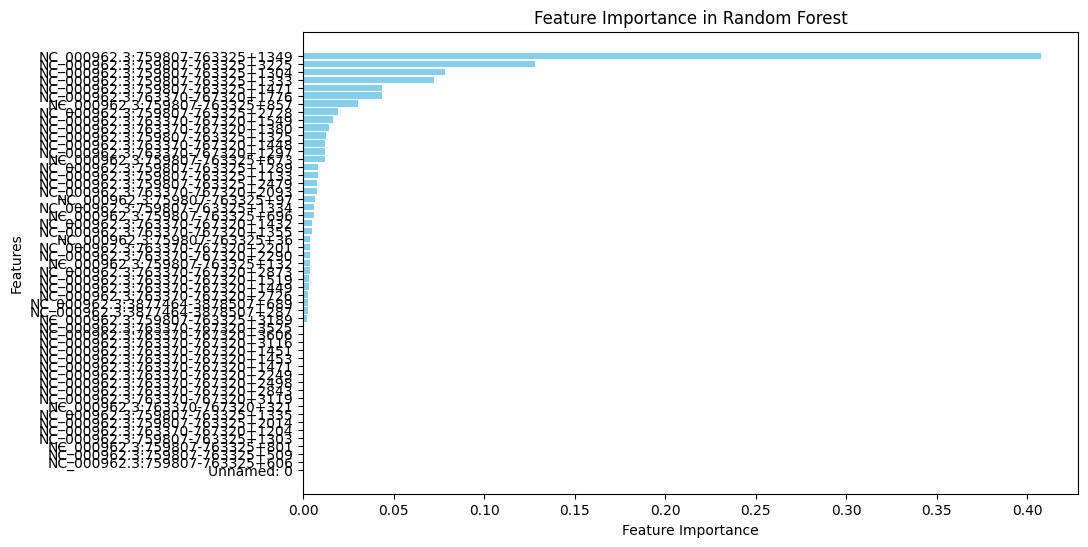

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_indices], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 1. Check class distribution
print(y.value_counts())

# 2. Look for constant or near-constant features
nunique = X.nunique()
print("Features with only 1 unique value:", nunique[nunique <= 1])

# 3. Compare class means to see if features differ at all
print(X.groupby(y).mean().T)

# 4. Check correlation of features with target
corrs = pd.concat([X, y.rename("target")], axis=1).corr()["target"].sort_values()
print(corrs)


Resistance
1    49
0    49
Name: count, dtype: int64
Features with only 1 unique value: Unnamed: 0                        1
NC_000962.3:759807-763325+509     1
NC_000962.3:759807-763325+1303    1
NC_000962.3:759807-763325+2014    1
NC_000962.3:763370-767320+1204    1
NC_000962.3:763370-767320+2498    1
NC_000962.3:763370-767320+2843    1
dtype: int64
Resistance                              0         1
Unnamed: 0                       0.000000  0.000000
NC_000962.3:3877464-3878507+287  1.000000  1.040816
NC_000962.3:3877464-3878507+689  1.000000  1.020408
NC_000962.3:759807-763325+36     1.020408  1.000000
NC_000962.3:759807-763325+97     2.979592  3.000000
NC_000962.3:759807-763325+132    0.979592  1.000000
NC_000962.3:759807-763325+509    1.000000  1.000000
NC_000962.3:759807-763325+606    1.959184  2.000000
NC_000962.3:759807-763325+673    2.000000  2.020408
NC_000962.3:759807-763325+696    1.959184  2.000000
NC_000962.3:759807-763325+801    3.000000  2.938776
NC_000962.3:759807-7633

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Assumes df is loaded and df['Resistance'] contains 'R'/'S'
y = df['Resistance'].map({'R': 1, 'S': 0}).astype(int)
X = df.drop(columns=['Resistance'])

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

pre = ColumnTransformer([
    ("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())]), num_cols),
    ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder(handle_unknown="ignore", sparse_output=False))]), cat_cols),
])

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)

pipe = Pipeline([("pre", pre), ("clf", rf)])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Out-of-fold predictions (no leakage)
proba = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]
pred = (proba >= 0.5).astype(int)

print(classification_report(y, pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC:", roc_auc_score(y, proba))
print("Avg Precision (PR-AUC):", average_precision_score(y, proba))
print("Confusion matrix:\n", confusion_matrix(y, pred))


              precision    recall  f1-score   support

           S       0.84      0.98      0.91        49
           R       0.98      0.82      0.89        49

    accuracy                           0.90        98
   macro avg       0.91      0.90      0.90        98
weighted avg       0.91      0.90      0.90        98

ROC-AUC: 0.9387755102040816
Avg Precision (PR-AUC): 0.950843909358644
Confusion matrix:
 [[48  1]
 [ 9 40]]


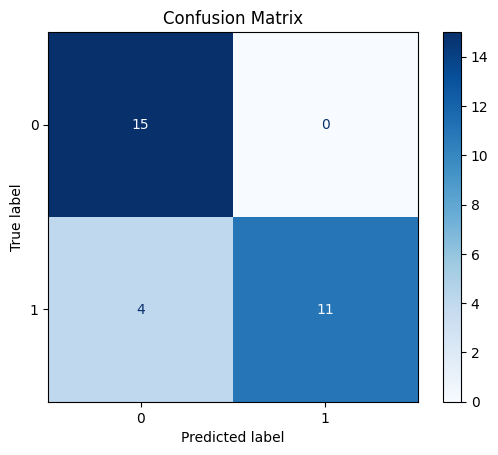

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Load data
df = pd.read_csv("rpoABC_variation_rifampicin_resistance.csv")

# Drop unnecessary columns
df_clean = df.drop(columns=['Unnamed: 0', 'Sample', 'ID'])

# Encode target variable
y = df_clean['Resistance'].map({'R': 1, 'S': 0}).astype(int)
X = df_clean.drop(columns=['Resistance'])

# Identify categorical columns (nucleotides A/T/C/G)
cat_cols = X.columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("oh", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]), cat_cols)
])

# Random Forest model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

# Full pipeline
pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", rf)
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
proba = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]
pred = (proba >= 0.5).astype(int)

# Metrics
print(classification_report(y, pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC:", roc_auc_score(y, proba))
print("Avg Precision (PR-AUC):", average_precision_score(y, proba))
print("Confusion matrix:\n", confusion_matrix(y, pred))


              precision    recall  f1-score   support

           S       0.83      0.98      0.90        49
           R       0.97      0.80      0.88        49

    accuracy                           0.89        98
   macro avg       0.90      0.89      0.89        98
weighted avg       0.90      0.89      0.89        98

ROC-AUC: 0.9348188254893794
Avg Precision (PR-AUC): 0.9506987744915738
Confusion matrix:
 [[48  1]
 [10 39]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# 1. Load dataset
df = pd.read_csv("rpoABC_variation_rifampicin_resistance.csv")

# 2. Drop unnecessary columns
df_clean = df.drop(columns=['Unnamed: 0', 'Sample', 'ID'])

# 3. Encode target variable (R=1, S=0)
y = df_clean['Resistance'].map({'R': 1, 'S': 0}).astype(int)
X = df_clean.drop(columns=['Resistance'])

# 4. Identify categorical columns (nucleotides A/T/C/G)
cat_cols = X.columns.tolist()

# 5. Preprocessing: One-Hot Encode categorical features
preprocessor = ColumnTransformer([
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("oh", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]), cat_cols)
])

# 6. Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

# 7. Build pipeline
pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", rf)
])

# 8. Stratified 5-fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
proba = cross_val_predict(pipe, X, y, cv=cv, method="predict_proba", n_jobs=-1)[:, 1]
pred = (proba >= 0.5).astype(int)

# 9. Output metrics
print("--- Classification Report ---")
print(classification_report(y, pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC:", roc_auc_score(y, proba))
print("Avg Precision (PR-AUC):", average_precision_score(y, proba))
print("Confusion matrix:\n", confusion_matrix(y, pred))


--- Classification Report ---
              precision    recall  f1-score   support

           S       0.83      0.98      0.90        49
           R       0.97      0.80      0.88        49

    accuracy                           0.89        98
   macro avg       0.90      0.89      0.89        98
weighted avg       0.90      0.89      0.89        98

ROC-AUC: 0.9348188254893794
Avg Precision (PR-AUC): 0.9506987744915738
Confusion matrix:
 [[48  1]
 [10 39]]


In [101]:
from sklearn.model_selection import train_test_split

# After you prepare X and y (step 3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Then fit your pipeline on the training data
pipe.fit(X_train, y_train)

# Predict probabilities and classes on the test data
proba_test = pipe.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

# Print classification metrics on test set
print("--- Classification Report (Test Set) ---")
print(classification_report(y_test, pred_test, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Test Set):", roc_auc_score(y_test, proba_test))
print("Avg Precision (PR-AUC) (Test Set):", average_precision_score(y_test, proba_test))
print("Confusion matrix (Test Set):\n", confusion_matrix(y_test, pred_test))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['R' 'S']

In [ ]:
from sklearn.model_selection import train_test_split

# 80% of data goes to training, 20% to testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train your pipeline on training data only
pipe.fit(X_train, y_train)

# Predict on training set (to check training performance)
train_proba = pipe.predict_proba(X_train)[:, 1]
train_pred = (train_proba >= 0.5).astype(int)

# Predict on testing set (to check generalization)
test_proba = pipe.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= 0.5).astype(int)

# Print metrics on training data
print("=== Training Set Performance ===")
print(classification_report(y_train, train_pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Train):", roc_auc_score(y_train, train_proba))
print("Avg Precision (Train):", average_precision_score(y_train, train_proba))

# Print metrics on testing data
print("\n=== Testing Set Performance ===")
print(classification_report(y_test, test_pred, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Test):", roc_auc_score(y_test, test_proba))
print("Avg Precision (Test):", average_precision_score(y_test, test_proba))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['R' 'S']

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load your dataset
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")


X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']


X_encoded = pd.get_dummies(X)


model = RandomForestClassifier(random_state=42)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


scores = cross_val_score(model, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation accuracies: [1.         0.8        1.         0.8        0.8        0.9
 0.8        1.         0.88888889 1.        ]
Average accuracy: 0.8988888888888888


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# =========================
# Step 0: Prepare Data
# =========================
# Example: assuming df is already loaded
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# =========================
# Step 1: Train/Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# Step 2: Random Forest Model
# =========================
model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # No max depth limit
    random_state=42,        # Reproducibility
    n_jobs=-1               # Use all cores
)

model.fit(X_train, y_train)

# =========================
# Step 3: Evaluation
# =========================
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           R       1.00      0.90      0.95        10
           S       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Assume df is already loaded
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_encoded, y)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}
Best CV Accuracy: 0.9294736842105262


In [ ]:
from sklearn.model_selection import cross_val_score

best_params = random_search.best_params_

rf_best = RandomForestClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1
)

cv_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_best, X_encoded, y, cv=cv_10)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation accuracies: [0.9        1.         1.         0.8        1.         0.7
 0.9        1.         0.88888889 1.        ]
Average accuracy: 0.9188888888888889


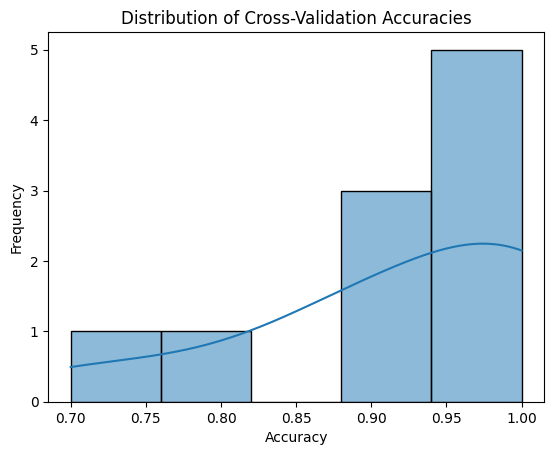

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(scores, kde=True, bins=5)
plt.title("Distribution of Cross-Validation Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # No max depth limit
    random_state=42,       
    n_jobs=-1              
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           R       1.00      0.90      0.95        10
           S       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



## End of Random Forest - Move onto the Three Remaining Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Prepare Data
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# Parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(probability=True, random_state=42)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_encoded, y)

print("Best Parameters (SVM):", random_search.best_params_)
print("Best CV Accuracy (SVM):", random_search.best_score_)


Best Parameters (SVM): {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
Best CV Accuracy (SVM): 0.9384210526315788


In [ ]:
from sklearn.model_selection import cross_val_score

best_params_svm = random_search.best_params_

svm_best = SVC(**best_params_svm, probability=True, random_state=42)

cv_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_svm = cross_val_score(svm_best, X_encoded, y, cv=cv_10)

print("Cross-validation accuracies (SVM):", scores_svm)
print("Average accuracy (SVM):", np.mean(scores_svm))


Cross-validation accuracies (SVM): [1.         1.         1.         1.         1.         0.9
 1.         0.9        0.77777778 1.        ]
Average accuracy (SVM): 0.9577777777777777


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

model_svm = SVC(**best_params_svm, probability=True, random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy (SVM): 0.95
              precision    recall  f1-score   support

           R       1.00      0.90      0.95        10
           S       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



## END OF SVM 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler 

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder



# data loading
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']


X_encoded = pd.get_dummies(X)


le = LabelEncoder()
y_encoded = le.fit_transform(y)


# we need to do Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model correctly
random_search.fit(X_encoded, y_encoded)

print("Best Parameters (XGB):", random_search.best_params_)
print("Best CV Accuracy (XGB):", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:59:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:59:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:59:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:59:28] WARN

Best Parameters (XGB): {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best CV Accuracy (XGB): 0.9794736842105264


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np


xgb_best = XGBClassifier(
    **best_params_xgb,  
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# 10-fold stratified CV
cv_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# IMPORTANT: use the numeric labels y_encoded, NOT y
scores_xgb = cross_val_score(xgb_best, X_encoded, y_encoded, cv=cv_10)

print("Cross-validation accuracies (XGB):", scores_xgb)
print("Average accuracy (XGB):", np.mean(scores_xgb))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:00:47] WARN

Cross-validation accuracies (XGB): [0.9        1.         1.         1.         1.         0.9
 1.         1.         0.88888889 1.        ]
Average accuracy (XGB): 0.9688888888888888


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# =========================
# Step 0: Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']

# Encode categorical features if needed
X_encoded = pd.get_dummies(X)

# Encode target labels to 0/1
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # S -> 0, R -> 1

# =========================
# Step 1: Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(probability=True, random_state=42)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_encoded, y_encoded)

print("Best Parameters (SVM):", random_search.best_params_)
print("Best CV Accuracy (SVM):", random_search.best_score_)


## Hyperparameter tuning for the SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assume X and y are already defined and X_encoded is your one-hot encoded X
X_encoded = pd.get_dummies(X)

model = RandomForestClassifier(random_state=42)

# Use StratifiedKFold to keep class proportions balanced in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation using the Stratified folds
scores = cross_val_score(model, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation accuracies: [0.9        0.95       0.85       0.89473684 0.94736842]
Average accuracy: 0.908421052631579


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# =========================
# Step 0: Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# =========================
# Step 1: Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


svm = SVC(probability=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_encoded, y)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 10}


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 10}
Cross-validation accuracies: [0.9        0.8        1.         0.8        0.8        0.9
 0.9        1.         0.88888889 1.        ]
Average accuracy: 0.8988888888888888


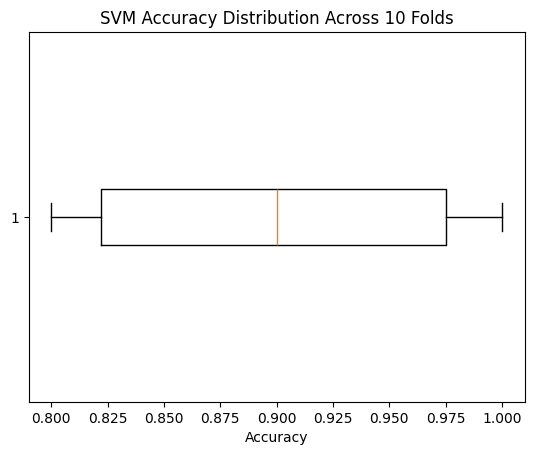

In [ ]:


# =========================
# Step 2: 10-Fold Cross-Validation
# =========================
best_svm = SVC(**best_params, probability=True, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_svm, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))

# =========================
# Step 3: Compare Distributions
# =========================
plt.boxplot(scores, vert=False)
plt.xlabel("Accuracy")
plt.title("SVM Accuracy Distribution Across 10 Folds")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (SVM): {'kernel': 'linear', 'gamma': 0.01, 'C': 10}
Cross-validation accuracies (SVM): [0.9        0.8        1.         0.8        0.8        0.9
 0.9        1.         0.88888889 1.        ]
Average accuracy (SVM): 0.8988888888888888


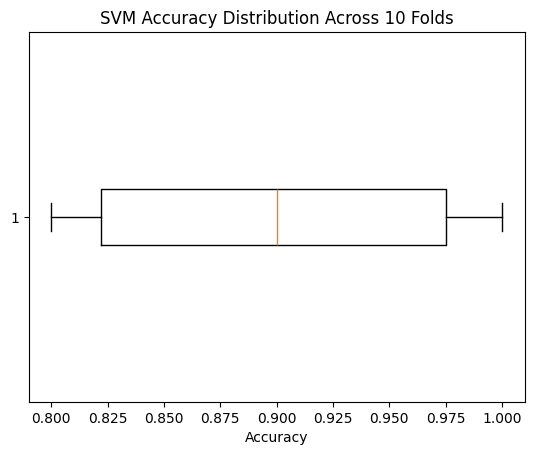

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# =========================
# Step 0: Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# =========================
# Step 1: Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(probability=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_encoded, y)
best_params_svm = random_search.best_params_
print("Best Parameters (SVM):", best_params_svm)

# =========================
# Step 2: 10-Fold Cross-Validation
# =========================
best_svm = SVC(**best_params_svm, probability=True, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_svm = cross_val_score(best_svm, X_encoded, y, cv=cv)
print("Cross-validation accuracies (SVM):", scores_svm)
print("Average accuracy (SVM):", np.mean(scores_svm))

# =========================
# Step 3: Compare Distributions
# =========================
plt.boxplot(scores_svm, vert=False)
plt.xlabel("Accuracy")
plt.title("SVM Accuracy Distribution Across 10 Folds")
plt.show()


In [ ]:

pip install SVC

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for SVC: filename=svc-0.1-py3-none-any.whl size=1907 sha256=e16f41be493af2f918a27a63d3197590d3dc2a893f5e9ef5e1bd22ff9be37b66
  Stored in directory: /Users/anyakhurana/Library/Caches/pip/wheels/08/54/4b/64a5987862924088a9437ff367856303e6843c517dc348a59c
Successfully built SVC
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [SVC]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score

In [ ]:
svm_best = SVC(**random_search_svm.best_params_, probability=True, random_state=42)
scores_svm = cross_val_score(svm_best, X_train, y_train, cv=cv_10)

print("SVM Cross-validation accuracies:", scores_svm)
print("SVM Average accuracy:", scores_svm.mean())


NameError: name 'random_search_svm' is not defined

In [ ]:
svm_best = SVC(**random_search_svm.best_params_, probability=True, random_state=42)
scores_svm = cross_val_score(svm_best, X_train, y_train, cv=cv_10)

print("SVM Cross-validation accuracies:", scores_svm)
print("SVM Average accuracy:", scores_svm.mean())



NameError: name 'random_search_svm' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

lr = LogisticRegression(random_state=42)
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid_lr,
    n_iter=15,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

random_search_lr.fit(X_train, y_train)
print("Best LR Parameters:", random_search_lr.best_params_)
print("Best LR CV Accuracy:", random_search_lr.best_score_)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Best LR Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 100}
Best LR CV Accuracy: 0.8983333333333334


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

In [ ]:
lr_best = LogisticRegression(**random_search_lr.best_params_, random_state=42)
scores_lr = cross_val_score(lr_best, X_train, y_train, cv=cv_10)

print("LR Cross-validation accuracies:", scores_lr)
print("LR Average accuracy:", scores_lr.mean())


LR Cross-validation accuracies: [1.         0.75       0.875      0.875      1.         0.75
 1.         0.875      0.85714286 1.        ]
LR Average accuracy: 0.8982142857142857


In [ ]:
lr_best = LogisticRegression(**random_search_lr.best_params_, random_state=42)
scores_lr = cross_val_score(lr_best, X_train, y_train, cv=cv_10)

print("LR Cross-validation accuracies:", scores_lr)
print("LR Average accuracy:", scores_lr.mean())


LR Cross-validation accuracies: [1.         0.75       0.875      0.875      1.         0.75
 1.         0.875      0.85714286 1.        ]
LR Average accuracy: 0.8982142857142857


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 10}
Cross-validation accuracies: [0.9        0.8        1.         0.8        0.8        0.9
 0.9        1.         0.88888889 1.        ]
Average accuracy: 0.8988888888888888


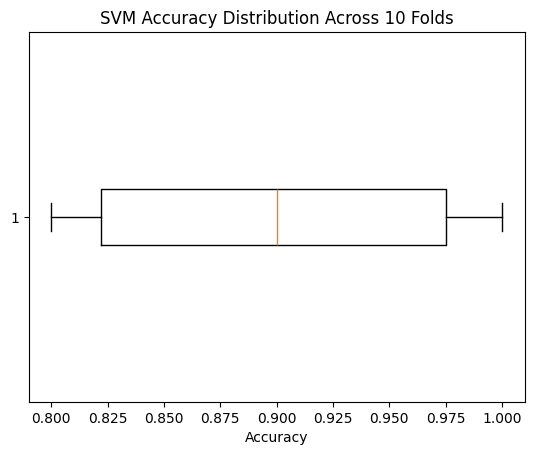

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# =========================
# Step 0: Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# =========================
# Step 1: Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(probability=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_encoded, y)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# =========================
# Step 2: 10-Fold Cross-Validation
# =========================
best_svm = SVC(**best_params, probability=True, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_svm, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))

# =========================
# Step 3: Compare Distributions
# =========================
plt.boxplot(scores, vert=False)
plt.xlabel("Accuracy")
plt.title("SVM Accuracy Distribution Across 10 Folds")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 10}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
   

Cross-validation accuracies: [0.9        0.6        1.         0.8        0.8        0.9
 0.9        1.         0.88888889 1.        ]
Average accuracy: 0.8788888888888889


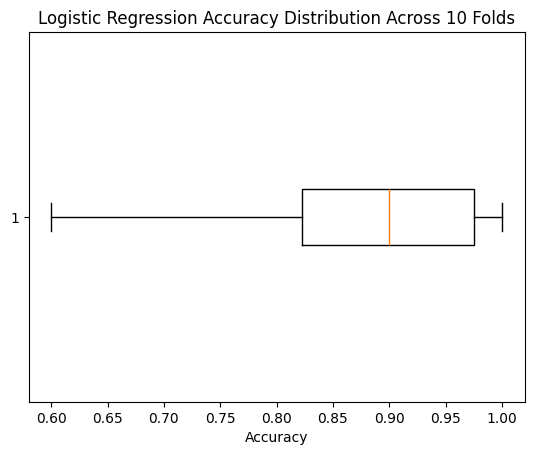

In [ ]:
from sklearn.linear_model import LogisticRegression

# =========================
# Step 0: Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# =========================
# Step 1: Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

lr = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_encoded, y)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# =========================
# Step 2: 10-Fold Cross-Validation
# =========================
best_lr = LogisticRegression(**best_params, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_lr, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))

# =========================
# Step 3: Compare Distributions
# =========================
plt.boxplot(scores, vert=False)
plt.xlabel("Accuracy")
plt.title("Logistic Regression Accuracy Distribution Across 10 Folds")
plt.show()


In [ ]:
from xgboost import XGBClassifier

# =========================
# Step 0: Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# =========================
# Step 1: Hyperparameter Tuning
# =========================
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_encoded, y)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# =========================
# Step 2: 10-Fold Cross-Validation
# =========================
best_xgb = XGBClassifier(**best_params, eval_metric='logloss', random_state=42, use_label_encoder=False)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(best_xgb, X_encoded, y, cv=cv)

print("Cross-validation accuracies:", scores)
print("Average accuracy:", np.mean(scores))

# =========================
# Step 3: Compare Distributions
# =========================
plt.boxplot(scores, vert=False)
plt.xlabel("Accuracy")
plt.title("XGBoost Accuracy Distribution Across 10 Folds")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/sklearn.py", line 1641, in fit
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['R' 'S']



==================== Random Forest ====================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}
Best CV Accuracy (5-fold): 0.9294736842105262
10-Fold CV Accuracies: [0.9        1.         1.         0.8        1.         0.8
 1.         1.         0.88888889 1.        ]
Average Accuracy: 0.9388888888888889
Test Accuracy: 1.0
              precision    recall  f1-score   support

           R       1.00      1.00      1.00        10
           S       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



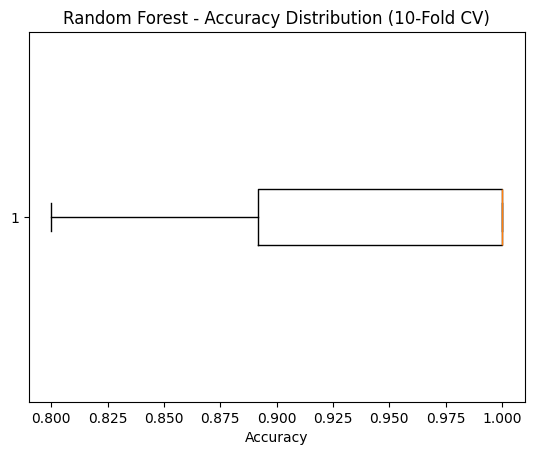


==================== SVM ====================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Best CV Accuracy (5-fold): 0.9589473684210527
10-Fold CV Accuracies: [1.  1.  1.  1.  1.  0.9 1.  0.9 1.  1. ]
Average Accuracy: 0.9800000000000001
Test Accuracy: 0.95
              precision    recall  f1-score   support

           R       1.00      0.90      0.95        10
           S       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



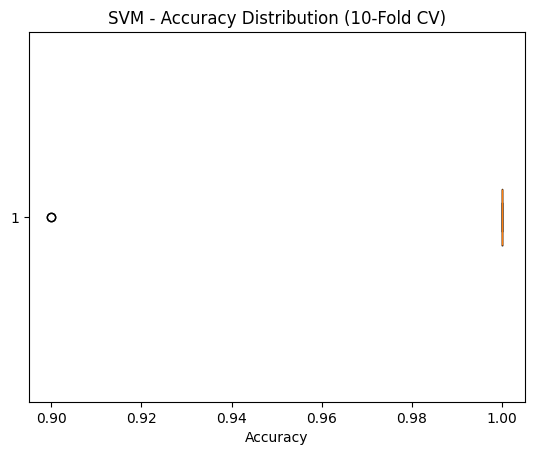


==================== Logistic Regression ====================
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Library/Frameworks/Python.f

Best Parameters: {'solver': 'liblinear', 'max_iter': 500, 'C': 10}
Best CV Accuracy (5-fold): 0.8889473684210525
10-Fold CV Accuracies: [0.9        0.6        1.         0.8        0.8        0.9
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.8788888888888889
Test Accuracy: 0.95
              precision    recall  f1-score   support

           R       1.00      0.90      0.95        10
           S       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



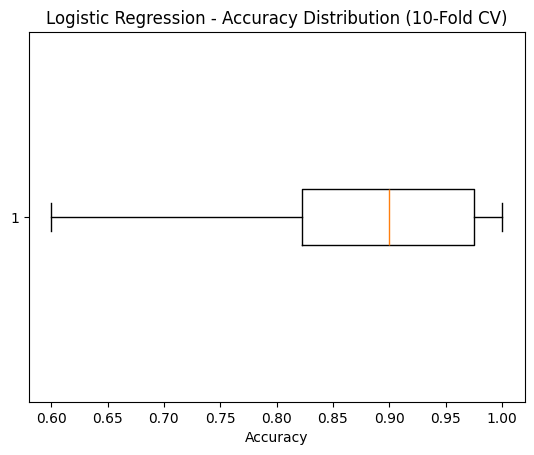


==================== XGBoost ====================
Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/sklearn.py", line 1641, in fit
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['R' 'S']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# =========================
# Data Preparation
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

cv_strategy_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_strategy_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Function to run the 3 steps for any model
def evaluate_model(model, param_grid, model_name):
    print(f"\n{'='*20} {model_name} {'='*20}")

    # Step 1: Hyperparameter Tuning
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,
        cv=cv_strategy_5,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    random_search.fit(X_encoded, y)
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)
    print("Best CV Accuracy (5-fold):", random_search.best_score_)

    # Step 2: 10-Fold Cross-Validation with best params
    best_model = model.__class__(**best_params)
    scores = cross_val_score(best_model, X_encoded, y, cv=cv_strategy_10)
    print("10-Fold CV Accuracies:", scores)
    print("Average Accuracy:", np.mean(scores))

    # Step 3: Final Train/Test Split Evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=42, stratify=y
    )
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Boxplot of CV scores
    plt.boxplot(scores, vert=False)
    plt.xlabel("Accuracy")
    plt.title(f"{model_name} - Accuracy Distribution (10-Fold CV)")
    plt.show()

# =========================
# Random Forest
# =========================
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
evaluate_model(RandomForestClassifier(random_state=42, n_jobs=-1), rf_param_grid, "Random Forest")

# =========================
# SVM
# =========================
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
evaluate_model(SVC(random_state=42), svm_param_grid, "SVM")

# =========================
# Logistic Regression
# =========================
log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}
evaluate_model(LogisticRegression(random_state=42, n_jobs=-1), log_param_grid, "Logistic Regression")

# =========================
# XGBoost
# =========================
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
evaluate_model(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, "XGBoost")
